In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('Churn_Modelling.csv')

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [18]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Input
print("Done")

Done


In [21]:
model = Sequential()


model = Sequential([
    Input(shape=(11,)),                # Input layer with 11 features
    Dense(11, activation='sigmoid'),   # Hidden layer 1
    Dense(11, activation='sigmoid'),   # Hidden layer 2
    Dense(1, activation='sigmoid')     # Output layer (binary classification)
])


In [22]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)


Each input neuron connects to each output neuron.

You have 11 input features

You have 11 neurons in this layer

So total weight connections:

11 inputs × 11 neurons = 121 weights

2️⃣ Biases

Each neuron has 1 bias.

Since there are 11 neurons


In [23]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
history = model.fit(X_train,y_train,batch_size=50,epochs=300,verbose=1,validation_split=0.2)

Epoch 1/300
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7923 - loss: 0.5046 - val_accuracy: 0.8119 - val_loss: 0.4771
Epoch 2/300
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.7923 - loss: 0.5049 - val_accuracy: 0.8119 - val_loss: 0.4761
Epoch 3/300
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.7923 - loss: 0.5047 - val_accuracy: 0.8119 - val_loss: 0.4755
Epoch 4/300
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.7923 - loss: 0.5048 - val_accuracy: 0.8119 - val_loss: 0.4748
Epoch 5/300
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.7923 - loss: 0.5048 - val_accuracy: 0.8119 - val_loss: 0.4756
Epoch 6/300
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.7923 - loss: 0.5048 - val_accuracy: 0.8119 - val_loss: 0.4758
Epoch 7/300
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.7923 - loss: 0.5046 - val_accuracy: 0.8119 - val_loss: 0.4765
Epoch 8/300
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.7923 - loss: 0

In [32]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


In [33]:
y_pred

array([[0.2242736 ],
       [0.21735   ],
       [0.14636181],
       ...,
       [0.14636181],
       [0.2242736 ],
       [0.21735   ]], shape=(2000, 1), dtype=float32)

In [34]:
y_pred = y_pred.argmax(axis=-1)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7965

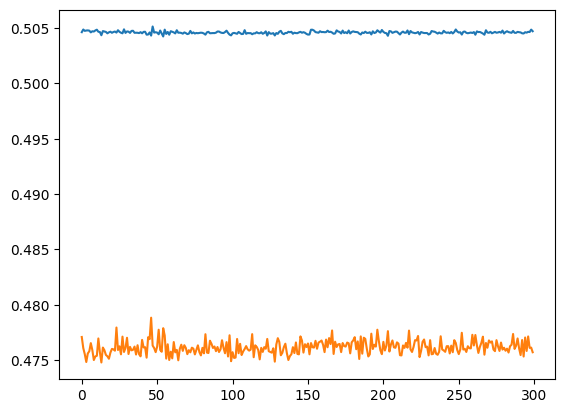

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

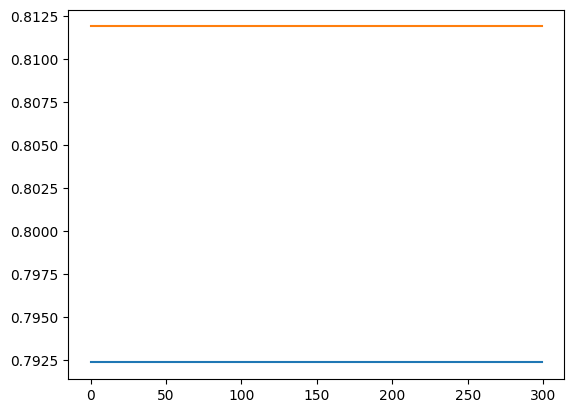

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])